In [1]:
import jax.numpy as jnp
import jax.numpy as np
import matplotlib.pyplot as plt
from syuron import shg, mgoslt, pp

# 定数
kappa = 1.031E-05
num_domains = 500


def eff_numerical(width_dim, wavelength_dim):
    fixed_superlattice = pp.fixed(num_domains, width_dim, kappa)
    eff_tensor = mgoslt.analyze(shg.Params(
        superlattice_dim=fixed_superlattice,
        T_dim=70,
        wavelength_dim=wavelength_dim,
        fund_power_dim=1,
        sh_power_dim=0,
    ))
    power_tensor = jnp.abs(eff_tensor[:, 0, :, 0, 0])**2
    power_tensor = power_tensor / jnp.max(power_tensor) * 10  # 正規化していい感じの値にする
    return power_tensor


def NPDA(L: np.ndarray, phase_mismatch: np.ndarray) -> np.ndarray:
    delta = phase_mismatch / 2
    return (kappa**2 * L**2 * np.sin(delta * L)**2) / ((delta * L)**2)


# 教科書2.62のNPDAは分極反転なしの式、周期分極反転構造の場合ちょっと工夫が必要
def eff_analytical(width_dim, wavelength_dim):
    width_dim = jnp.array(width_dim)
    wavelength_dim = jnp.array(wavelength_dim)
    width, wavelength = jnp.meshgrid(width_dim, wavelength_dim, indexing='ij')
    phase_mismatch = mgoslt.use_material(
        wavelength, 70)(1)  # type: ignore z=1の時2\Delta \cdot z = 2\Delta
    K = jnp.pi / width
    phase_mismatch = phase_mismatch - K  # NPDAの方では delta に 補正が入る
    result = NPDA(num_domains * width, phase_mismatch)
    result = result / jnp.max(result) * 10  # 正規化していい感じの値にする
    return result


# 変数
m_width_dim = np.linspace(3.5, 3.7, 100).tolist()
m_wavelength_dim = jnp.linspace(1.025, 1.035, 100).tolist()


power_tensor_numerical = eff_numerical(
    m_width_dim, m_wavelength_dim)
result = eff_analytical(
    m_width_dim, m_wavelength_dim)
print(power_tensor_numerical.shape)
print(result.shape)

2025-05-07 07:56:58.702436: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746604618.724119   65864 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746604618.730825   65864 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1746604618.747138   65864 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1746604618.747159   65864 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1746604618.747161   65864 computation_placer.cc:177] computation placer alr

(100, 100)
(100, 100)


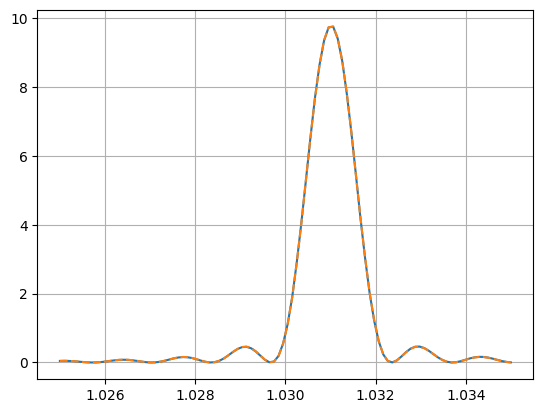

In [2]:
# 積分による計算結果とNPDAを用いた近似解法による計算結果を比較して、数値解法が正しいことを確認しておく

plt.plot(m_wavelength_dim, power_tensor_numerical[50])
plt.plot(m_wavelength_dim, result[50], linestyle='--')
plt.grid(True)
plt.show()

(100, 100)
(100, 100)


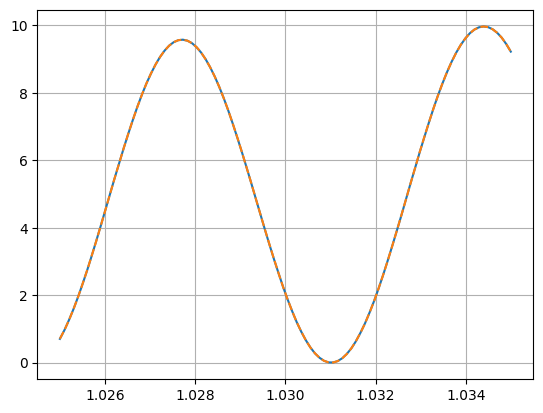

In [3]:
import jax.numpy as jnp
import jax.numpy as np
import matplotlib.pyplot as plt
from syuron import shg, mgoslt, pp

# 定数
kappa = 1.031E-05
num_domains = 1


def eff_numerical(width_dim, wavelength_dim):
    fixed_superlattice = pp.fixed(num_domains, width_dim, kappa)
    eff_tensor = mgoslt.analyze(shg.Params(
        superlattice_dim=fixed_superlattice,
        T_dim=70,
        wavelength_dim=wavelength_dim,
        fund_power_dim=1,
        sh_power_dim=0,
    ))
    power_tensor = jnp.abs(eff_tensor[:, 0, :, 0, 0])**2
    power_tensor = power_tensor / jnp.max(power_tensor) * 10  # 正規化していい感じの値にする
    return power_tensor


def NPDA(L: np.ndarray, phase_mismatch: np.ndarray) -> np.ndarray:
    delta = phase_mismatch / 2
    return (kappa**2 * L**2 * np.sin(delta * L)**2) / ((delta * L)**2)


# 教科書2.62のNPDAは分極反転なしの式、周期分極反転構造の場合ちょっと工夫が必要
def eff_analytical(width_dim, wavelength_dim):
    width_dim = jnp.array(width_dim)
    wavelength_dim = jnp.array(wavelength_dim)
    width, wavelength = jnp.meshgrid(width_dim, wavelength_dim, indexing='ij')
    phase_mismatch = mgoslt.use_material(
        wavelength, 70)(1)  # type: ignore z=1の時2\Delta \cdot z = 2\Delta
    result = NPDA(num_domains * width, phase_mismatch)
    result = result / jnp.max(result) * 10  # 正規化していい感じの値にする
    return result


# 変数
m_width_dim = np.linspace(350, 370, 100).tolist() # 幅を大きくしてみて、積分とNPDAの結果が一致するか確認
m_wavelength_dim = jnp.linspace(1.025, 1.035, 100).tolist()


power_tensor_numerical = eff_numerical(
    m_width_dim, m_wavelength_dim)
result = eff_analytical(
    m_width_dim, m_wavelength_dim)
print(power_tensor_numerical.shape)
print(result.shape)

# 積分による計算結果とNPDAを用いた近似解法による計算結果を比較して、数値解法が正しいことを確認しておく

plt.plot(m_wavelength_dim, power_tensor_numerical[50])
plt.plot(m_wavelength_dim, result[50], linestyle='--')
plt.grid(True)
plt.show()